In [1]:
import  VARmodel

In [2]:
import loadDataForSKtime

loader = loadDataForSKtime.PatientTimeSeriesLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = loader.load_data(100)
train_data, test_data = loader.split_train_test(df)


<class 'list'>
Patient 1: Dropping — constant columns found
Patient 2: Less than 46 time points — skipping.
Patient 4: Less than 46 time points — skipping.
Patient 5: Dropping — constant columns found
Patient 6: Less than 46 time points — skipping.
Patient 7: Less than 46 time points — skipping.
Patient 8: Less than 46 time points — skipping.
Patient 10: Less than 46 time points — skipping.
Patient 11: Less than 46 time points — skipping.
Patient 12: Less than 46 time points — skipping.
Patient 13: Less than 46 time points — skipping.
Patient 14: Less than 46 time points — skipping.
Patient 15: Less than 46 time points — skipping.
Patient 16: Less than 46 time points — skipping.
Patient 17: Less than 46 time points — skipping.
Patient 20: Less than 46 time points — skipping.
Patient 22: Less than 46 time points — skipping.
Patient 23: Less than 46 time points — skipping.
Patient 24: Dropping — constant columns found
Patient 25: Dropping — constant columns found
Patient 26: Less than 46

In [14]:
test_data.to_pickle("test_data.pkl")

In [3]:
# load data
import pandas as pd
train_data = pd.read_pickle("all_train_data_neg1fill.pkl")
test_data = pd.read_pickle("all_test_data_neg1fill.pkl")

In [6]:
VARforecaster = VARmodel.VARForecaster(train_data, test_data, ['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])

In [7]:
VARforecaster.fit()
VARforecasts = VARforecaster.predict(steps=6)

In [9]:
VARforecasts

HR       O2Sat          SBP         MAP  \
Patient_ID ICULOS                                                    
2          17      171.176837  108.968097   485.274444  240.446727   
           18      -60.769534   85.888411  -274.308747 -126.147436   
           19      223.394492  115.845614   677.275379  332.817162   
           20     -147.285577   72.612998  -580.352054 -261.181618   
           21      350.995182  129.160896  1114.002942  533.330476   
...                       ...         ...          ...         ...   
998        49       79.814443   82.704153    89.531360   57.695563   
           50       78.691004   81.610715    89.668809   58.285871   
           51       77.573834   81.447252    90.401181   58.767911   
           52       76.377340   81.682248    91.127006   59.262665   
           53       75.154524   82.126152    91.748352   59.647475   

                          DBP       Resp        Temp  
Patient_ID ICULOS                                     
2          17      176.525205  10.403367  218.709099  
           18     -105.634545  40.368749 -285.258646  
           19      238.638055 -20.859384  338.771774  
           20     -215.904498  51.846553 -418.180344  
           21      399.088868 -37.730565  602.315964  
...                       ...        ...         ...  
998        49       46.693496  20.636950   23.778256  
           50       46.741277  18.786619   21.587301  
           51       46.855188  17.456580   20.641234  
           52       46.809410  16.481288   20.220641  
           53       46.578340  15.772246   20.166231  

[3462 rows x 7 columns]

In [8]:
VARforecaster.evaluate_model(VARforecasts) # 100

Model Evaluation Results:
  - Mean Absolute Error (MAE): 5.4615
  - Mean Squared Error (MSE): 90.0612
  - Root Mean Squared Error (RMSE): 9.4901
  - Mean Absolute Percentage Error (MAPE): 8.36%
  - Forecasting Accuracy: 91.64%


{'MAE': 5.461524130225763,
 'MSE': 90.06117438859776,
 'RMSE': 9.490056606185115,
 'MAPE': 8.36128365642473,
 'Accuracy': 91.63871634357527}

In [9]:
VARforecaster.evaluate_model(VARforecasts) #1000

Model Evaluation Results:
  - Mean Absolute Error (MAE): 5.4615
  - Mean Squared Error (MSE): 90.0612
  - Root Mean Squared Error (RMSE): 9.4901
  - Mean Absolute Percentage Error (MAPE): 8.36%
  - Forecasting Accuracy: 91.64%


{'MAE': 5.461524130225763,
 'MSE': 90.06117438859776,
 'RMSE': 9.490056606185115,
 'MAPE': 8.36128365642473,
 'Accuracy': 91.63871634357527}

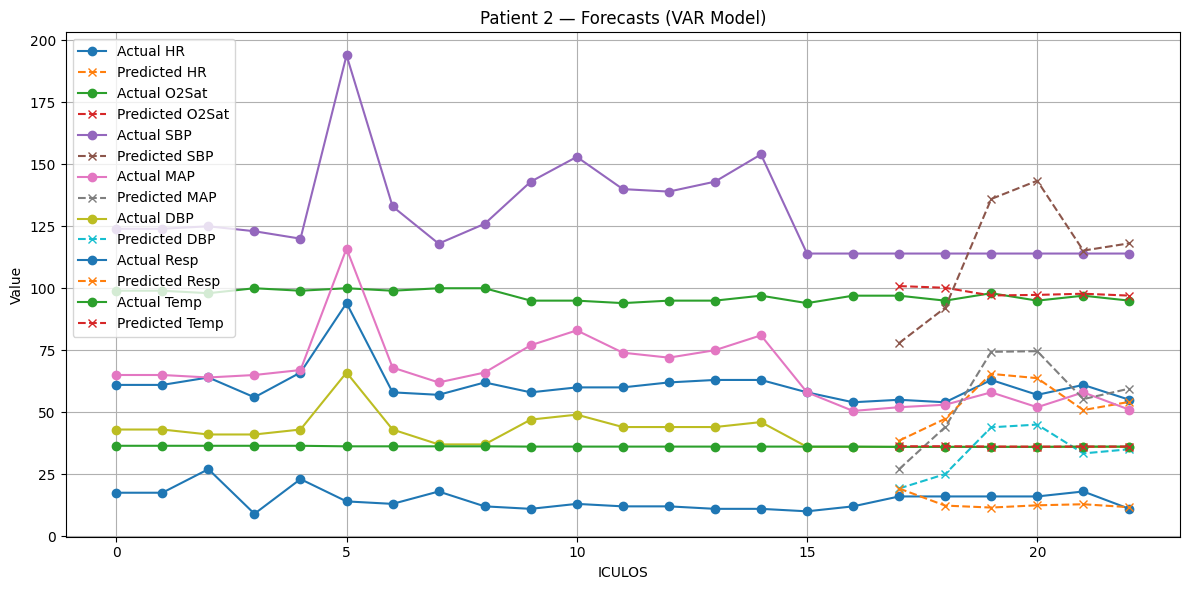

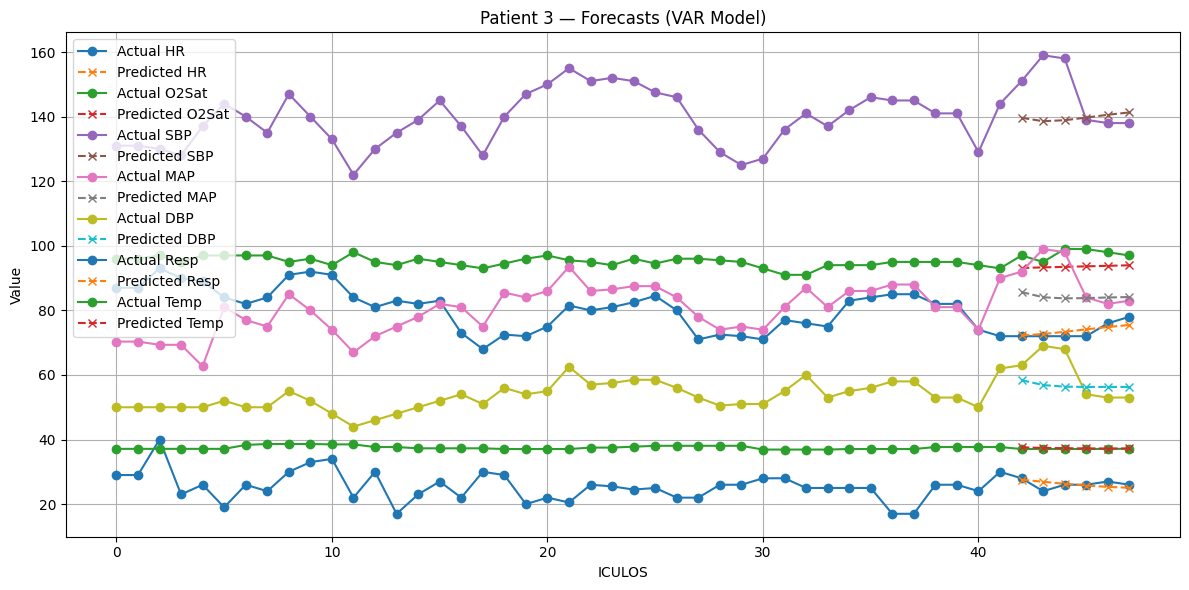

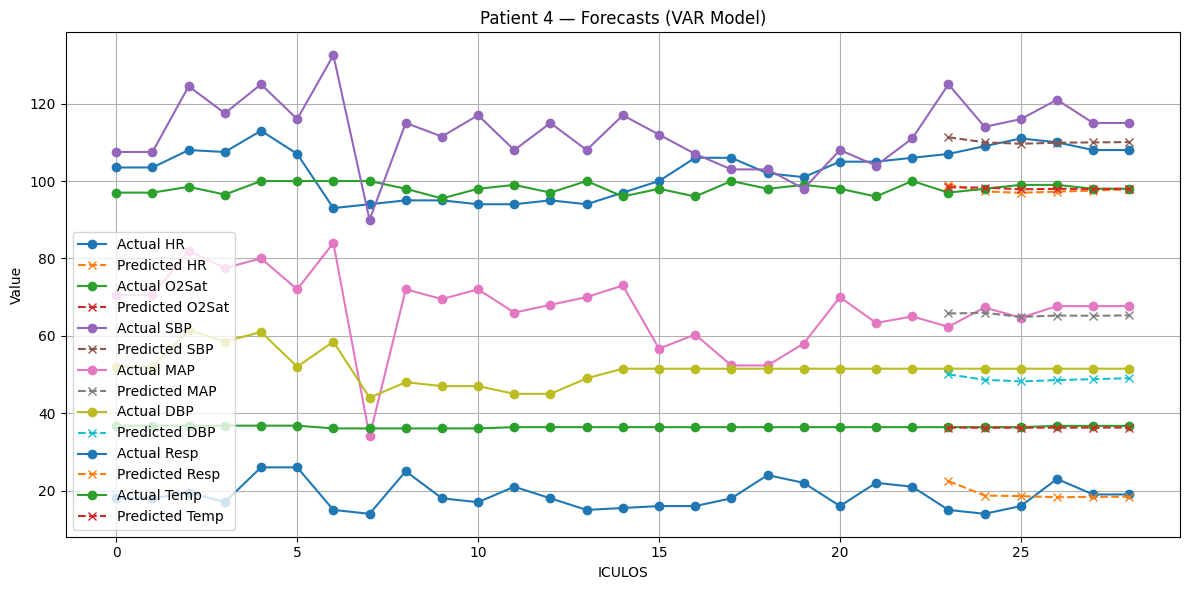

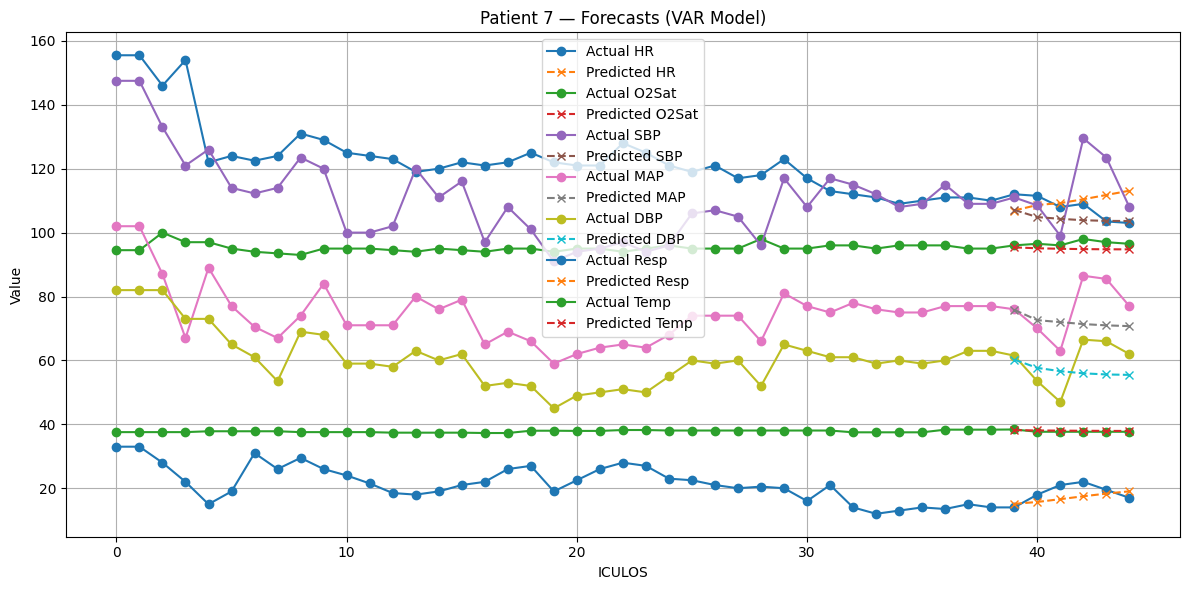

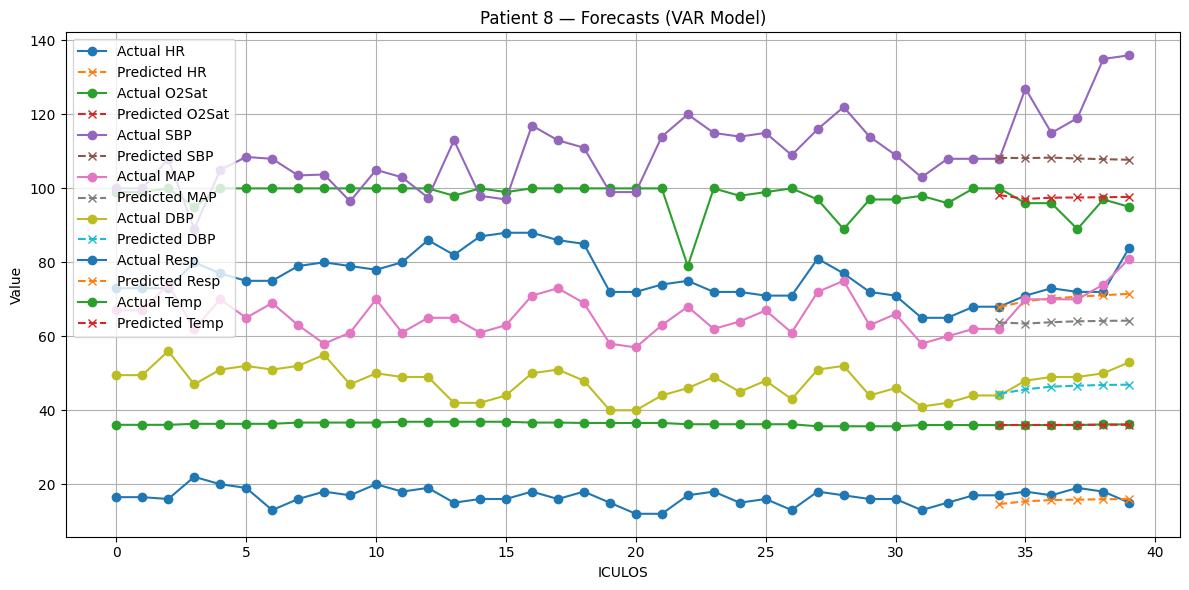

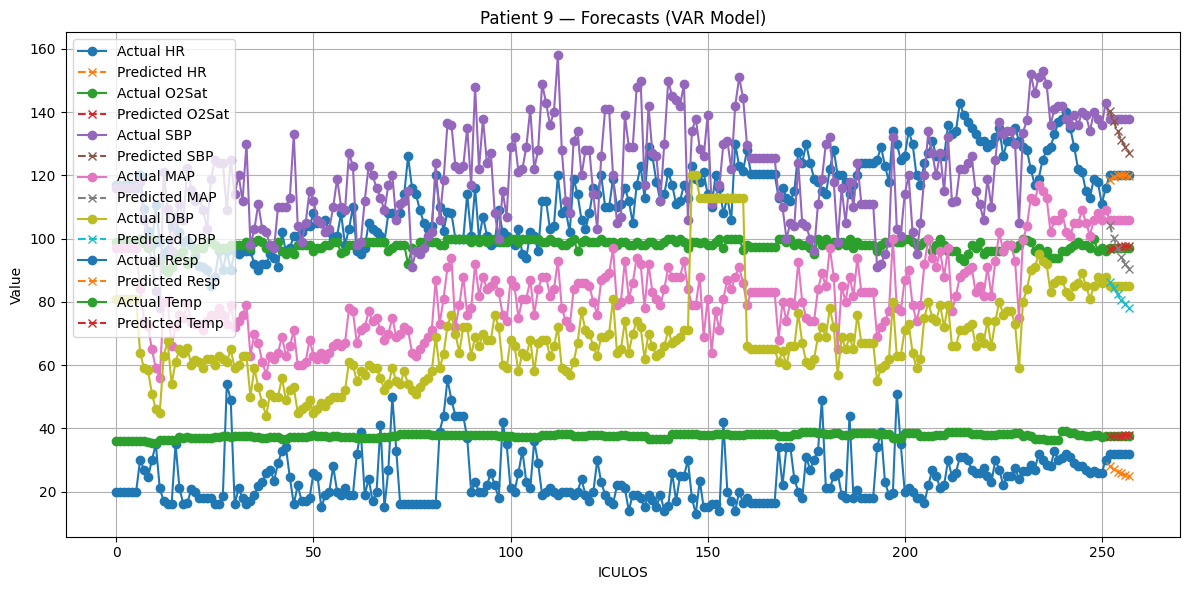

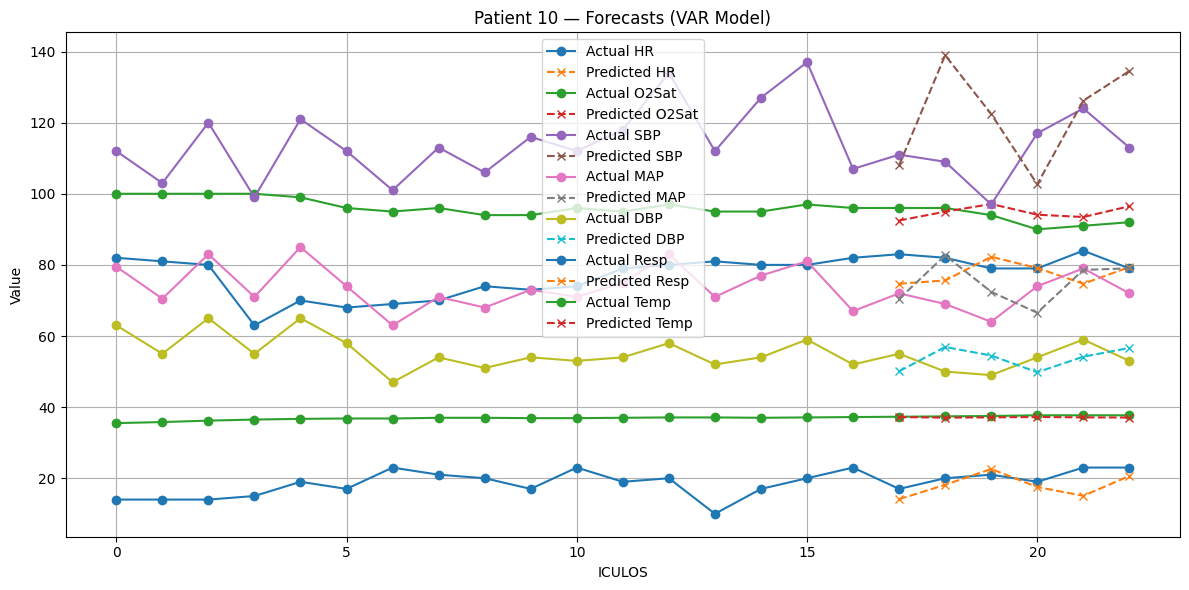

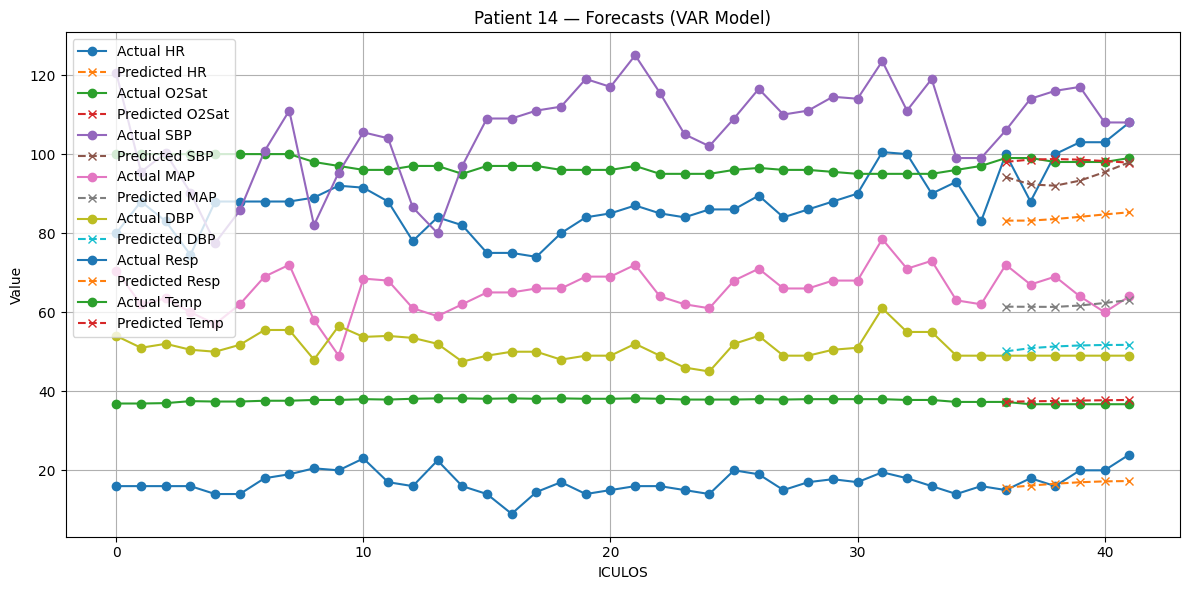

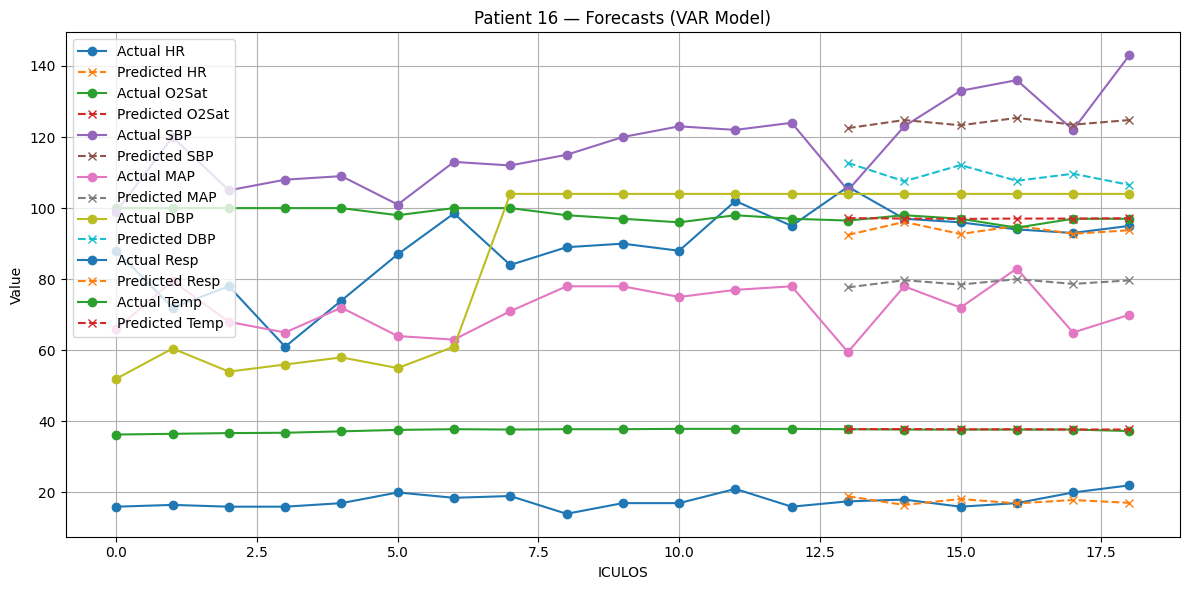

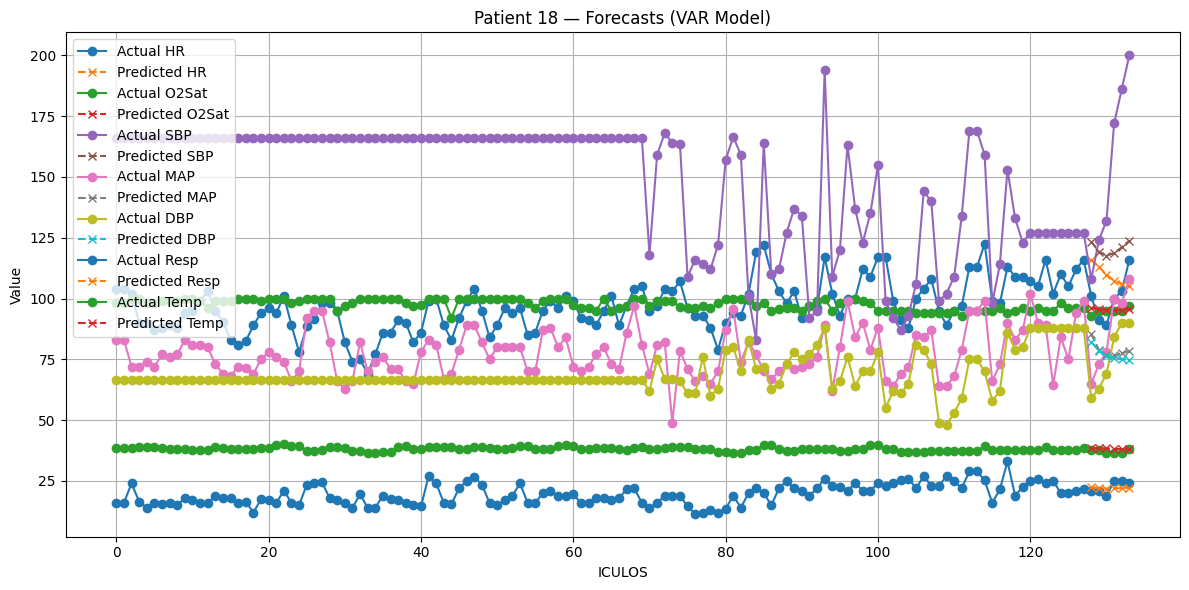

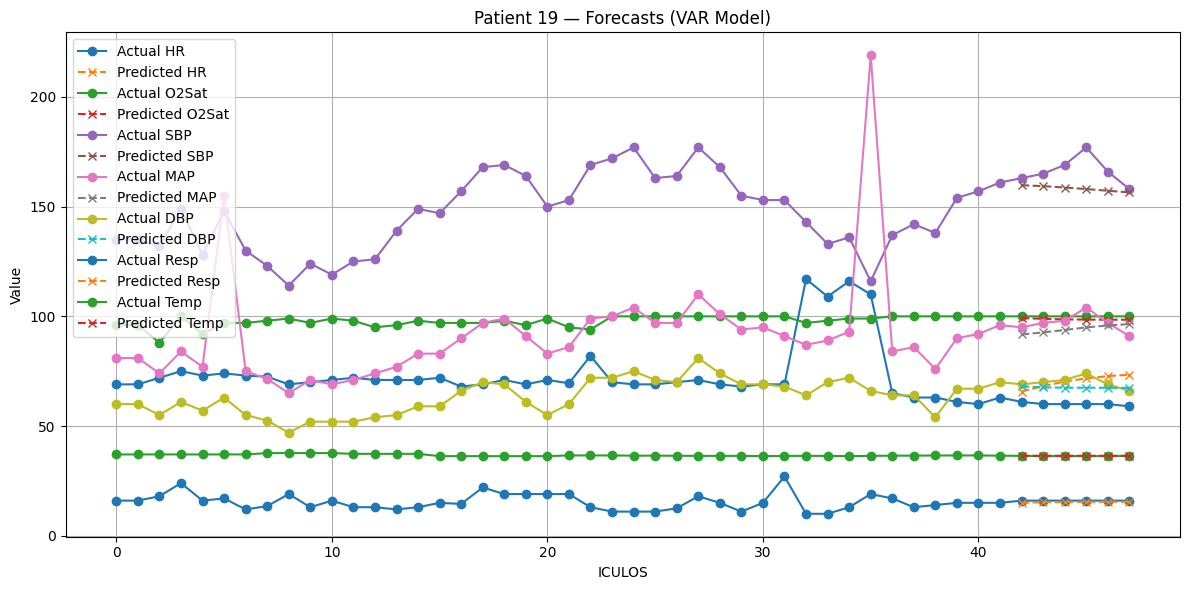

In [16]:
for patient_id in range(1, 20):
    if patient_id in VARforecasts.index.get_level_values("Patient_ID"):
        VARforecaster.plot_forecast(VARforecasts, patient_id)

In [11]:
from sktime.distances import dtw_distance
import numpy as np

dtw_list = []

for pid in test_data.index.get_level_values("Patient_ID").unique():
    for feature in test_data.columns:
        timeseries = test_data.loc[pid, feature]
        forecasted_timeseries = VARforecasts.loc[pid, feature]
        
        x = np.array(timeseries)
        y = np.array(forecasted_timeseries)
        
        dtw_val = dtw_distance(x, y)
        dtw_list.append(dtw_val)

average_dtw = np.mean(dtw_list)
print("Average DTW:", average_dtw)


Average DTW: 508.51363324411864


In [13]:
import loadDataForSKtime

loader2 = loadDataForSKtime.PatientTimeSeriesLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ['Temp', 'HR', 'PTT', 'Platelets', 'WBC'])
df2 = loader2.load_data(1000)
train_data2, test_data2 = loader2.split_train_test(df2)


<class 'list'>
Patient 1: Dropping — constant columns found
Patient 2: Less than 46 time points — skipping.
Patient 3: Dropping — constant columns found
Patient 4: Less than 46 time points — skipping.
Patient 5: Dropping — constant columns found
Patient 6: Less than 46 time points — skipping.
Patient 7: Less than 46 time points — skipping.
Patient 8: Less than 46 time points — skipping.
Patient 10: Less than 46 time points — skipping.
Patient 11: Less than 46 time points — skipping.
Patient 12: Less than 46 time points — skipping.
Patient 13: Less than 46 time points — skipping.
Patient 14: Less than 46 time points — skipping.
Patient 15: Less than 46 time points — skipping.
Patient 16: Less than 46 time points — skipping.
Patient 17: Less than 46 time points — skipping.
Patient 18: Dropping — constant columns found
Patient 19: Dropping — constant columns found
Patient 20: Less than 46 time points — skipping.
Patient 21: Dropping — constant columns found
Patient 22: Less than 46 time p

In [14]:
train_data2

Temp     HR   PTT  Platelets   WBC
Patient_ID ICULOS                                     
9          0       36.00  117.0  46.4       64.0   8.9
           1       36.00  117.0  46.4       64.0   8.9
           2       36.00  117.0  46.4       64.0   8.9
           3       36.00  117.0  40.8      114.0   3.9
           4       36.00  117.0  40.8      114.0   3.9
...                  ...    ...   ...        ...   ...
990        39      37.80  103.0  27.9      283.0  15.0
           40      37.68  102.0  27.9      283.0  15.0
           41      37.80  104.0  27.9      283.0  15.0
           42      37.80  103.0  27.9      283.0  15.0
           43      37.90  112.5  27.9      283.0  15.0

[5321 rows x 5 columns]

In [15]:
VARforecaster2 = VARmodel.VARForecaster(train_data2, test_data2, ['Temp', 'HR', 'PTT', 'Platelets', 'WBC'])

In [16]:
VARforecaster2.fit()
forecasts2 = VARforecaster2.predict()

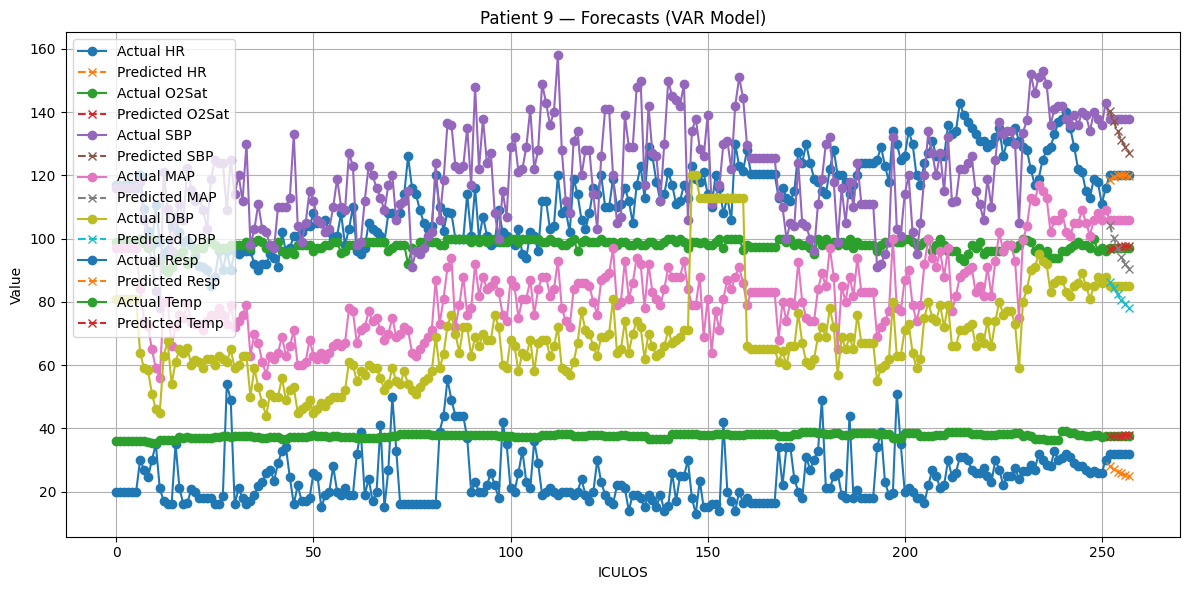

In [20]:
for patient_id in range(1, 10):
    if patient_id in forecasts2.index.get_level_values("Patient_ID"):
        VARforecaster.plot_forecast(VARforecasts, patient_id)

In [21]:
VARforecaster2.evaluate_model(forecasts2)

Model Evaluation Results:
  - Mean Absolute Error (MAE): 4.0057
  - Mean Squared Error (MSE): 97.1721
  - Root Mean Squared Error (RMSE): 9.8576
  - Mean Absolute Percentage Error (MAPE): 6.03%
  - Forecasting Accuracy: 93.97%


{'MAE': 4.005732124454319,
 'MSE': 97.17212353928083,
 'RMSE': 9.857592177569574,
 'MAPE': 6.026793346420069,
 'Accuracy': 93.97320665357994}